In [1]:
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from math import sqrt
from sktime.utils.plotting import plot_series
import warnings
warnings.filterwarnings('ignore')

In [2]:
count=pd.read_csv('Train_SU63ISt.csv',index_col=1)

In [3]:
count

,ID,Count
Datetime,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2
...,...,...
25-09-2014 19:00,18283,868
25-09-2014 20:00,18284,732
25-09-2014 21:00,18285,702


In [4]:
count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18288 entries, 25-08-2012 00:00 to 25-09-2014 23:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      18288 non-null  int64
 1   Count   18288 non-null  int64
dtypes: int64(2)
memory usage: 428.6+ KB


In [5]:
count.index=pd.PeriodIndex(count.index,freq="H")

In [6]:
count.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 18288 entries, 2012-08-25 00:00 to 2014-09-25 23:00
Freq: H
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      18288 non-null  int64
 1   Count   18288 non-null  int64
dtypes: int64(2)
memory usage: 428.6 KB


In [7]:
y_train=count['Count']

In [8]:
y_test=pd.read_csv('Test_0qrQsBZ.csv',index_col=1)
y_test.index=pd.PeriodIndex(y_test.index,freq="H")
y_test

,ID
Datetime,
2014-09-26 00:00,18288
2014-09-26 01:00,18289
2014-09-26 02:00,18290
2014-09-26 03:00,18291
2014-09-26 04:00,18292
...,...
2015-04-26 19:00,23395
2015-04-26 20:00,23396
2015-04-26 21:00,23397


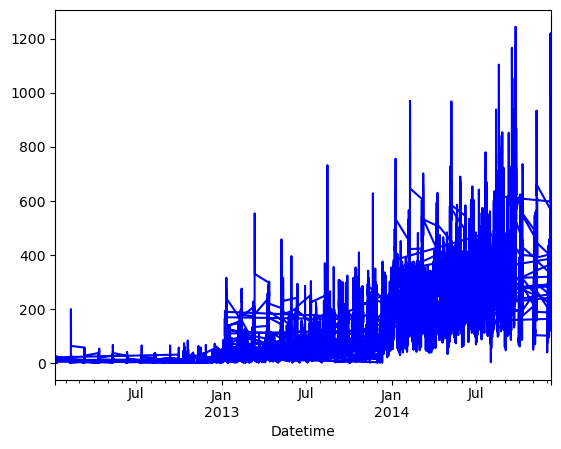

In [9]:
y_train.plot(color='blue',label='train')

plt.show()

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=187702.293, Time=9.04 sec


In [ ]:
model = auto_arima(y_train, trace=True, error_action='ignore', 
                  suppress_warnings=True,seasonal=True,m=24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=187.10 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=187752.233, Time=0.48 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=184707.797, Time=25.20 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=185844.866, Time=24.92 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=187750.242, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=187738.425, Time=0.61 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=183501.858, Time=90.69 sec


In [ ]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

In [ ]:
plot_series(y_train,y_test,forecast,labels=['train','test','forecast'])
plt.show()

In [23]:
# plt.plot(y_train, label='Train',color="blue")
# plt.plot(y_test, label='Valid',color="pink")
# plt.plot(forecast, label='Prediction',color="purple")
# plt.legend(loc='best')
# plt.show()

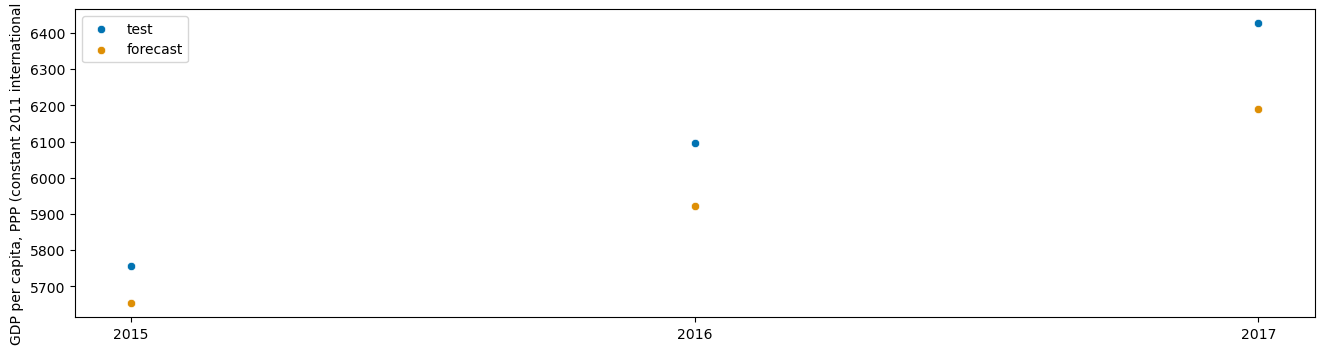

In [24]:
plot_series(y_test,forecast,labels=['test','forecast'],)
plt.show()

In [25]:
# #plotting the result
# plt.plot(y_test)
# plt.plot(forecast, color='red')
# plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 179.509


In [27]:
#Building the data on the whole data

In [28]:
model = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=301.294, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=303.598, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=300.782, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=299.039, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=300.815, Time=0.05 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=300.739, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=300.410, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=301.598, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=302.234, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 0.841 seconds


In [29]:
import numpy as np
forecast = model.predict(n_periods=12)
# forecast = pd.DataFrame(forecast,index = np.arange(y.shape[0]+1,y.shape[0]+7),
#                         columns=['Prediction'])
forecast

2018     6757.142767
2019     7087.611534
2020     7418.080301
2021     7748.549068
2022     8079.017835
2023     8409.486602
2024     8739.955370
2025     9070.424137
2026     9400.892904
2027     9731.361671
2028    10061.830438
2029    10392.299205
Freq: A-DEC, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='GDP per capita, PPP (constant 2011 international $)'>)

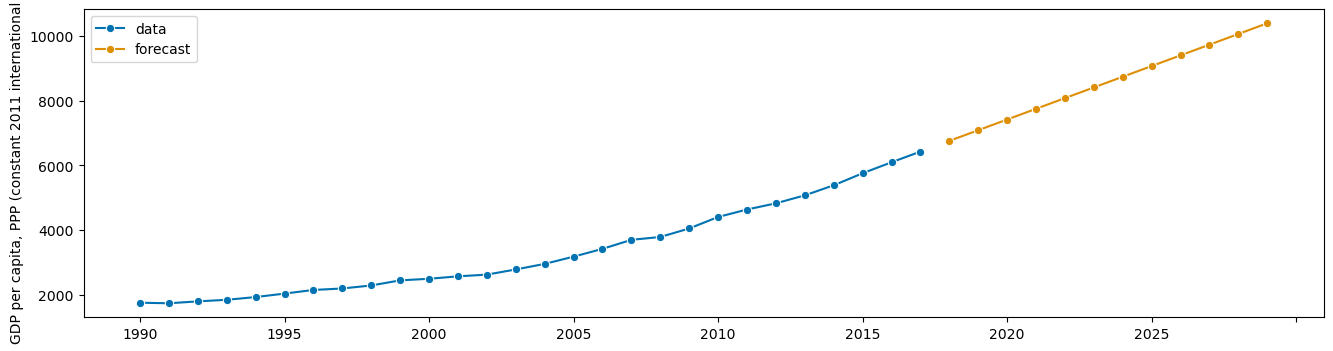

In [31]:
plot_series(y,forecast,labels=['data','forecast'])

In [32]:
# #plot the predictions for validation set
# plt.plot(y, label='Train',color="pink")
# plt.plot(forecast, label='Prediction',color="blue")
# plt.show()